# 今天的核心问题：样本量与统计功效
#### 

### 几个一般化的规则：

1. Bentler： 样本量 > 需要估计的参数量（free parameters） * 5.
        
2. Jacksong： 样本量 >  * 10 为可接受；样本量 > 需要估计的参数 * 20 为理想
 

#### 
### 更reasonable的思路是把 样本量 和 统计功效（statistical power） 联系起来

#### 
### SEM的两种统计功效检验
#### （1）整个SEM模型多大程度上是存在的/可信的/稳定的

后面我们讲到RMSEA法可以检验此统计功效

#### （2）SEM的某一个目标效应多大程度上是存在的/可信的/稳定的

通过蒙地卡罗法可以对SEM某一效应做检验。可以通过simulation的方式检验 SEM 各路径的效应量，假设模拟100次，其中90次某路径效应显著不为0，那么该目标效应的效应量为90%

#### 
### 通常我们认为好的的统计功效应该   ≥ 0.80。


### 方案一： 蒙地卡罗法


In [3]:
#使用 MonteCarloSEM 函数库，实现对sem的蒙地卡罗分析
library('MonteCarloSEM')

Warning message:
"程辑包'MonteCarloSEM'是用R版本4.2.3 来建造的"


假设我们需要探讨下面sem模型
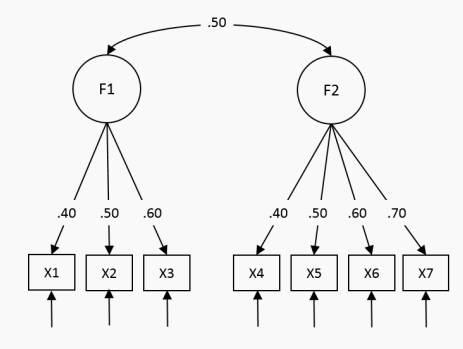
这里面我们已知上面所有fixed effect，统计功效和样本量两者知道一个就可以计算出另一个。

#### MonteCarloSEM 的5个常用函数

1. fcors.value():设定潜变量相关阵，保存成matrix
2. loading.value():设定显变量对潜变量的载荷阵，保存成matirx
3. sim.normal():根据模型设计，产生正态分布的数据
4. sim.skewed():根据模型设计，产生偏态分布的数据
5. fit.simulation(): 根据sim.normal()或sim.skewed()产生的数据，跑模型，此模型不必与真实模型相同。

In [4]:
fcors.value(nf=2, cors=c(1,0.5,0.5,1))

1.0,0.5
0.5,1.0


其中，nf是number of factor，即潜变量个数；
cors是潜变量的相关阵

In [5]:
loading.value(nf=2, fl.loads = c(0.4, 0.5, 0.6, 0, 0, 0 ,0,
                                 0, 0, 0, 0.4, 0.5, 0.6, 0.7))

0.4,0.0
0.5,0.0
0.6,0.0
0.0,0.4
0.0,0.5
0.0,0.6
0.0,0.7


其中，nf是number of factor，即潜变量个数； cors是潜变量的相关阵
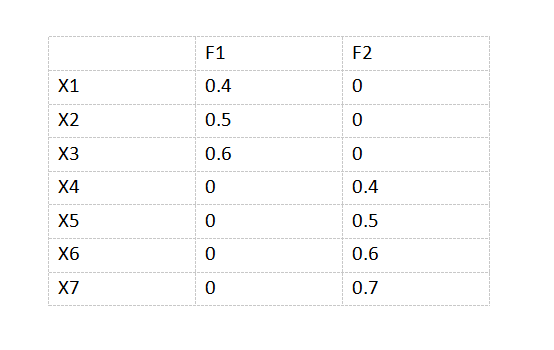

In [6]:
#现在假设我们想要根据上面的CFA模型生成100个数据集，每个数据集样本量500
FCorr <- fcors.value(nf=2, cors=c(1,0.5,0.5,1))
FLoad <- loading.value(nf=2, fl.loads = c(0.4, 0.5, 0.6, 0, 0, 0 ,0,
                                         0, 0, 0, 0.4, 0.5, 0.6, 0.7))
#假设我们有理由认为我们的数据是正态变化的
sim.normal(nd = 100, ss = 500, fcors = FCorr, loading = FLoad,
           f.loc='C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata')

1 % of simulation is completed...

2 % of simulation is completed...

3 % of simulation is completed...

4 % of simulation is completed...

5 % of simulation is completed...

6 % of simulation is completed...

7 % of simulation is completed...

8 % of simulation is completed...

9 % of simulation is completed...

10 % of simulation is completed...

11 % of simulation is completed...

12 % of simulation is completed...

13 % of simulation is completed...

14 % of simulation is completed...

15 % of simulation is completed...

16 % of simulation is completed...

17 % of simulation is completed...

18 % of simulation is completed...

19 % of simulation is completed...

20 % of simulation is completed...

21 % of simulation is completed...

22 % of simulation is completed...

23 % of simulation is completed...

24 % of simulation is completed...

25 % of simulation is completed...

26 % of simulation is completed...

27 % of simulation is completed...

28 % of simulation is completed...

2

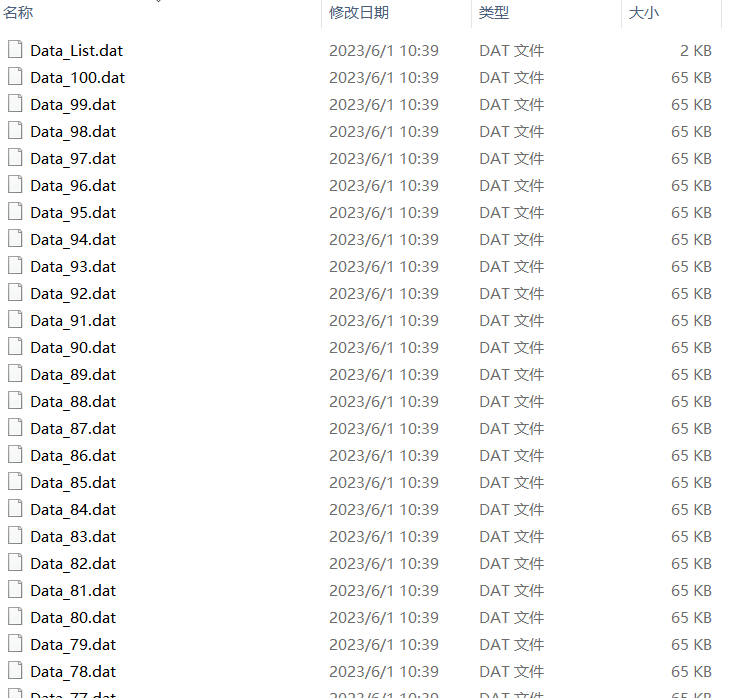

In [7]:
LavaanM <- '

# CFA Model
f1 =~ NA*x1 + x2 + x3
f2 =~ NA*x4 + x5 + x6 + x7

# Factor Correlations
f1 ~~ f2

# Factor variance
f1 ~~ 1*f1
f2 ~~ 1*f2
'
DList <- "Data_List.dat"
FileLoc <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata"
fit.simulation(model = LavaanM, PEmethod = "MLR", dataList = DList, f.loc = 
FileLoc)

[1] "1% has completed..."
[1] "2% has completed..."
[1] "3% has completed..."
[1] "4% has completed..."
[1] "5% has completed..."
[1] "6% has completed..."
[1] "7% has completed..."
[1] "8% has completed..."
[1] "9% has completed..."
[1] "10% has completed..."
[1] "11% has completed..."
[1] "12% has completed..."
[1] "13% has completed..."
[1] "14% has completed..."
[1] "15% has completed..."
[1] "16% has completed..."
[1] "17% has completed..."
[1] "18% has completed..."
[1] "19% has completed..."
[1] "20% has completed..."
[1] "21% has completed..."
[1] "22% has completed..."
[1] "23% has completed..."
[1] "24% has completed..."
[1] "25% has completed..."
[1] "26% has completed..."
[1] "27% has completed..."
[1] "28% has completed..."
[1] "29% has completed..."
[1] "30% has completed..."
[1] "31% has completed..."
[1] "32% has completed..."
[1] "33% has completed..."
[1] "34% has completed..."
[1] "35% has completed..."
[1] "36% has completed..."
[1] "37% has completed..."
[1] "38% h

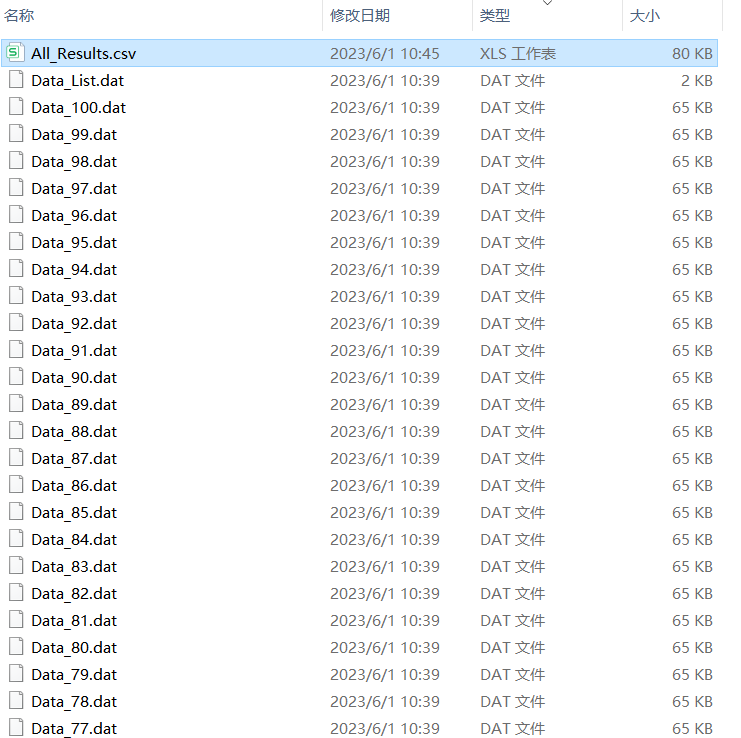

In [ ]:
output <- read.csv(file="C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata/All_Results.csv",header=T)

In [ ]:
head(output)

### 假如我们希望统计功效>80%，求样本量多少合适。
### 可以套用for循环，样本量从100往上逐次尝试，统计功效大于80%时，跳出

### 
## 如果是偏态的怎么办？
正态情境下上述CFA
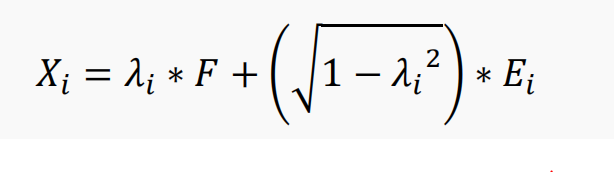
𝑋𝑖 是条目 i 的得分, F 是因子得分, 𝜆𝑖 和 𝐸𝑖 是条目 i 因子载荷和 random error  

偏态情境下，Fleishman’s power transformation method (Fleishman, 1978)
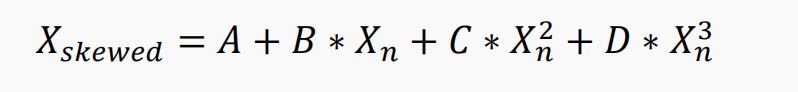
Xn 是之前生成的正态分布变量. A, B, C 和 D是采用Fleishman法基于特定的 skewness and kurtosis 确定 、
假如， 根据 skewness 和 kurtosis 确定 B, C 和 D 是1.0174852, .190995 和 -.018577 （Values for Sk = 1, K = 1）

In [9]:
#可以使用SimMultiCorrData中的find_constants直接实现转化
library(SimMultiCorrData)

Warning message:
"程辑包'SimMultiCorrData'是用R版本4.2.3 来建造的"

载入程辑包：'SimMultiCorrData'


The following object is masked from 'package:stats':

    poly




In [10]:
find_constants("Fleishman", 1, 1)

$constants
        c0         c1         c2         c3 
-0.1909936  1.0174824  0.1909936 -0.0185767 

$valid
[1] "FALSE"

In [11]:
#假设我们的数据是偏态的
FCorr <- fcors.value(nf = 2, cors = c(1, .5, .5, 1))
FLoad <- loading.value(nf = 2, fl.loads = c(.4, .5, .6, 0, 0, 0 ,0,
                                             0, 0, 0, .4, .5, .6, .7))
IfNon <- c(0, 0, 0, 0, 0, 1, 1)
FleisV <- c(1.0174852, .190995, -.018577) 

FileLoc <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata_skewed"
sim.skewed(nd = 100, ss = 500, fcors = FCorr, loading = FLoad, nonnormal = IfNon, 
Fleishman = FleisV, f.loc = FileLoc)

1 % of simulation is completed...

2 % of simulation is completed...

3 % of simulation is completed...

4 % of simulation is completed...

5 % of simulation is completed...

6 % of simulation is completed...

7 % of simulation is completed...

8 % of simulation is completed...

9 % of simulation is completed...

10 % of simulation is completed...

11 % of simulation is completed...

12 % of simulation is completed...

13 % of simulation is completed...

14 % of simulation is completed...

15 % of simulation is completed...

16 % of simulation is completed...

17 % of simulation is completed...

18 % of simulation is completed...

19 % of simulation is completed...

20 % of simulation is completed...

21 % of simulation is completed...

22 % of simulation is completed...

23 % of simulation is completed...

24 % of simulation is completed...

25 % of simulation is completed...

26 % of simulation is completed...

27 % of simulation is completed...

28 % of simulation is completed...

2

In [12]:
LavaanM <- '
# CFA Model
f1 =~ NA*x1 + x2 + x3
f2 =~ NA*x4 + x5 + x6 + x7
# Factor Correlations
f1 ~~ f2
# Factor variance
f1 ~~ 1*f1
f2 ~~ 1*f2
'
DList <- "Data_List.dat"
FileLoc <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata_skewed"
fit.simulation(model = LavaanM, PEmethod = "MLR", dataList = DList, f.loc = FileLoc)

[1] "1% has completed..."
[1] "2% has completed..."
[1] "3% has completed..."
[1] "4% has completed..."
[1] "5% has completed..."
[1] "6% has completed..."
[1] "7% has completed..."
[1] "8% has completed..."
[1] "9% has completed..."
[1] "10% has completed..."
[1] "11% has completed..."
[1] "12% has completed..."
[1] "13% has completed..."
[1] "14% has completed..."
[1] "15% has completed..."
[1] "16% has completed..."
[1] "17% has completed..."
[1] "18% has completed..."
[1] "19% has completed..."
[1] "20% has completed..."
[1] "21% has completed..."
[1] "22% has completed..."
[1] "23% has completed..."
[1] "24% has completed..."
[1] "25% has completed..."
[1] "26% has completed..."
[1] "27% has completed..."
[1] "28% has completed..."
[1] "29% has completed..."
[1] "30% has completed..."
[1] "31% has completed..."
[1] "32% has completed..."
[1] "33% has completed..."
[1] "34% has completed..."
[1] "35% has completed..."
[1] "36% has completed..."
[1] "37% has completed..."
[1] "38% h

In [ ]:
output2 <- read.csv(file="C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/Montedata_skewed/All_Results.csv",header=T)

In [ ]:
head(output2)

## 总结，Monte Carlo尤其适合什么情景？

1. 你需要提供SEM中某一个路径效应的统计功效是多少。

2. Monte Carlo尤其适合后验的场景，例如我们已经做完了研究，fixed effect已知，或者根据前人研究对fixed effect已有预期。


## 文献引用

Orcan, F. (2021). MonteCarloSEM: An R Package to Simulate Data for SEM. International Journal of Assessment Tools in Education, 8(3), 704-713.

Muthén, L. K., & Muthén, B. O. (2002). How to use a Monte Carlo study to decide on sample size and determine power. Structural equation modeling, 9(4), 599-620.

Fleishman, A. I. (1978). A method for simulating non-normal distributions. Psychometrika, 43, 
521-532. https://doi.org/10.1007/BF02293811